运用SIR模型进行模拟。需要输入odeint()函数的参数：微分方程、初始值、t以及微分方程的相关参数，我们首先需要定义我们刚刚建立好的SIR微分方程：

In [4]:
#   我们定义函数的名称为SIR
def SIR(y,t,beta,gamma):
    S,I,R = y
    dSdt = -S*(I/(S+I+R))*beta
    dIdt = beta*S*I/(S+I+R)-gamma*I
    dRdt = gamma*I
    return [dSdt,dIdt,dRdt]

In [5]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/大数据分析与挖掘/新冠疫情分析/alltime_China_2021_01_07.csv')
data

,date,lastUpdateTime,total_confirm,total_suspect,total_heal,total_dead,total_severe,total_input,total_storeConfirm,today_confirm,today_suspect,today_heal,today_dead,today_severe,today_storeConfirm,today_input
0,2020/1/13,NaN,41,0,0,1,NaN,0,0,0,0,0,0,NaN,0,0
1,2020/1/14,NaN,41,0,0,1,NaN,0,0,0,0,0,0,NaN,0,0
2,2020/1/15,NaN,41,0,5,2,NaN,0,0,0,0,0,0,NaN,0,0
3,2020/1/16,NaN,45,0,8,2,NaN,0,0,0,0,0,0,NaN,0,0
4,2020/1/17,NaN,62,0,12,2,NaN,0,0,0,0,0,0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,2021/1/2,NaN,96894,0,90788,4791,NaN,4303,1315,65,0,0,0,NaN,0,16
356,2021/1/3,NaN,96972,0,90851,4791,NaN,4323,1330,78,0,0,0,NaN,0,20
357,2021/1/4,NaN,97061,0,90914,4794,NaN,4339,1353,89,0,0,0,NaN,0,16
358,2021/1/5,NaN,97127,0,91008,4794,NaN,4348,1325,66,2,0,0,NaN,0,9


In [6]:
data = data[['total_confirm', 'total_dead', 'total_heal']]
data

,total_confirm,total_dead,total_heal
0,41,1,0
1,41,1,0
2,41,2,5
3,45,2,8
4,62,2,12
...,...,...,...
355,96894,4791,90788
356,96972,4791,90851
357,97061,4794,90914
358,97127,4794,91008


In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
a = data.tail(1)
a

,total_confirm,total_dead,total_heal
359,97217,4795,91106


In [9]:
b = data
b

,total_confirm,total_dead,total_heal
0,41,1,0
1,41,1,0
2,41,2,5
3,45,2,8
4,62,2,12
...,...,...,...
355,96894,4791,90788
356,96972,4791,90851
357,97061,4794,90914
358,97127,4794,91008


In [10]:
a = b.loc[0,['total_confirm']]
int(a)

41

对全国新冠进行分析

In [11]:
#通过搜索，我们可以知道全国的人口数量大约为13.9亿，
# 人口总数
N = 1395000000
# 初始感染人数
I0 = int(b.loc[0,['total_confirm']])
# 初始恢复人数=初始治愈人数+初始死亡人数
R0 = int(b.loc[0,['total_dead']])+int(b.loc[0,['total_heal']])
# 所以，初始易感者人群人数 = 总人数 - 初始感染人数 - 初始治愈人数
S0 = N - I0 - R0
# 设置初始值
y0 = [S0, I0, R0]

In [12]:
y0

[1394999958, 41, 1]

  再然后，我们确定数组t以及在微分方程中的两个参数$\beta$与$\gamma$的值。我们首先确定我们估计从初始值开始疫情发展60天的状态。
  通过搜索一些关于新冠疫情的研究报告，我们可以看到这里$\beta$的估计值约等于0.125~0.25，而$\gamma$的估计值约等于0.05。
  这也就是说，之前在湖北省疫情期间，新冠病情的治愈周期大约为20天。我们先设置$\beta$的值等于0.125。

In [13]:
import numpy as np

# 设置估计疫情的时间跨度为60天
t = np.linspace(1,60,60)

# 设置beta值等于0.125
beta = 0.125

# 设置gamma的值等于0.05
gamma = 0.05

接下来我们就开始运用scipy.integrate.odeint()函数，获得微分方程组的解的函数值。

In [14]:
from scipy.integrate import odeint

# 求解
solution = odeint(SIR, y0, t, args = (beta, gamma))

这样，我们就获得了60天内对每一天的S、I和R的估计值，通过输出solution，我们可以对结果进行查看：

In [15]:
# 要求Python的所有输出不用科学计数法表示
np.set_printoptions(suppress=True)

# 输出结果的前四行进行查看
solution[0:4,0:3]

array([[1.39499996e+09, 4.10000000e+01, 1.00000000e+00],
       [1.39499995e+09, 4.41932501e+01, 3.12883349e+00],
       [1.39499995e+09, 4.76352036e+01, 5.42346932e+00],
       [1.39499994e+09, 5.13452308e+01, 7.89682094e+00]])

我们可以很明显的发现，在1月25日至27日时，三类人群的人数还是在不断上升的，但是用数字来对结果进行观察还是不够直观，
下一步，我们尝试用绘图的方式，来将SIR模型的预测结果更清晰的展现出来：

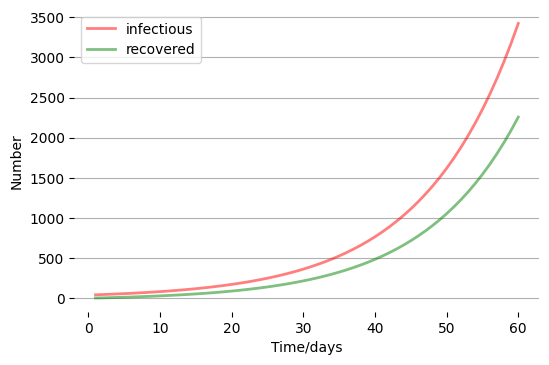

In [16]:
import matplotlib.pyplot as plt
# 绘图展示
%matplotlib inline

fig, ax = plt.subplots(facecolor='w', dpi=100)
# 感染者用红色表示，恢复者用绿色表示
for data, color, label_name in zip([solution[:,1], solution[:,2]], ['r', 'g'], ['infectious', 'recovered']):
    ax.plot(t, data, color, alpha=0.5, lw=2, label=label_name)

ax.set_xlabel('Time/days')
ax.set_ylabel('Number')
ax.legend()
ax.grid(axis='y')
plt.box(False)

观察扩充为360天

In [17]:
t = np.linspace(1,360,360)
solution = odeint(SIR, y0, t, args = (beta, gamma))

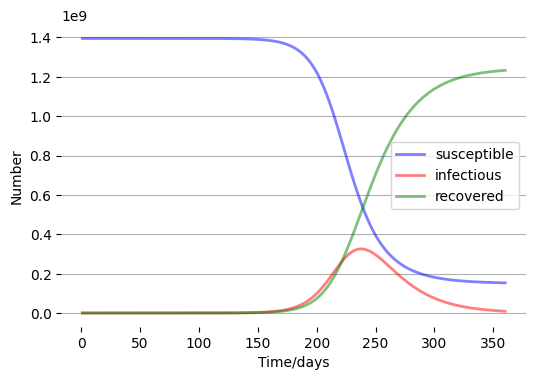

In [18]:
fig, ax = plt.subplots(facecolor='w', dpi=100)

for index, color, label_name in zip(range(3), ['b','r','g'], ['susceptible', 'infectious', 'recovered']):
    ax.plot(t, solution[:, index], color, alpha=0.5, lw=2, label=label_name)

ax.set_xlabel('Time/days')
ax.set_ylabel('Number')
ax.legend()
ax.grid(axis='y')
plt.box(False)

In [19]:
data = pd.read_csv('/content/drive/MyDrive/大数据分析与挖掘/新冠疫情分析/alltime_China_2021_01_07.csv')
data

,date,lastUpdateTime,total_confirm,total_suspect,total_heal,total_dead,total_severe,total_input,total_storeConfirm,today_confirm,today_suspect,today_heal,today_dead,today_severe,today_storeConfirm,today_input
0,2020/1/13,NaN,41,0,0,1,NaN,0,0,0,0,0,0,NaN,0,0
1,2020/1/14,NaN,41,0,0,1,NaN,0,0,0,0,0,0,NaN,0,0
2,2020/1/15,NaN,41,0,5,2,NaN,0,0,0,0,0,0,NaN,0,0
3,2020/1/16,NaN,45,0,8,2,NaN,0,0,0,0,0,0,NaN,0,0
4,2020/1/17,NaN,62,0,12,2,NaN,0,0,0,0,0,0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,2021/1/2,NaN,96894,0,90788,4791,NaN,4303,1315,65,0,0,0,NaN,0,16
356,2021/1/3,NaN,96972,0,90851,4791,NaN,4323,1330,78,0,0,0,NaN,0,20
357,2021/1/4,NaN,97061,0,90914,4794,NaN,4339,1353,89,0,0,0,NaN,0,16
358,2021/1/5,NaN,97127,0,91008,4794,NaN,4348,1325,66,2,0,0,NaN,0,9


下面我们在数据中选择出每一天的实际感染者人数与恢复者人数：

In [20]:
#每一天实际感染人数
infectious_real = data['total_confirm'] - data['total_dead'] - data['total_heal']
#恢复人数
recovered_real = data['total_heal'] + data['total_dead']
#易感者人数
susceptible_real = N -data['total_heal'] + data['total_dead']

然后我们需要根据爬取到数据的长度重新确定我们需要观察的时间周期，之后进行绘图：

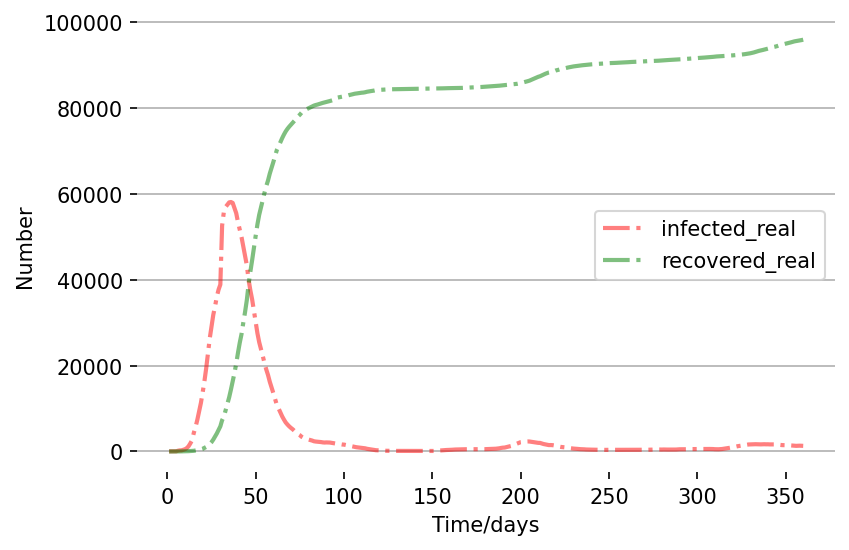

In [21]:
# 确定观察的时间周期
T = len(infectious_real)
# 设置估计疫情的时间跨度为T天
t = np.linspace(1,T,T)
# 估计三种人数的数量
solution = odeint(SIR, y0, t, args = (beta,gamma))
# 绘图
fig, ax = plt.subplots(facecolor='w', dpi=150)
# 绘制真实的I曲线、R曲线
ax.plot(t, infectious_real, 'r-.', alpha=0.5, lw=2, label='infected_real')
ax.plot(t, recovered_real, 'g-.', alpha=0.5, lw=2, label='recovered_real')
# 设置横纵座标轴
ax.set_xlabel('Time/days')
ax.set_ylabel('Number')
# 添加图例
ax.legend()
ax.grid(axis='y')
plt.box(False)

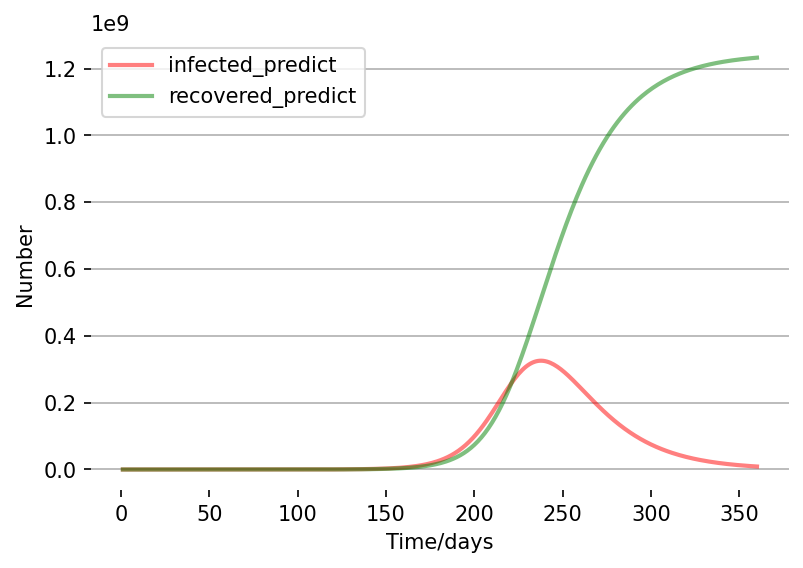

In [22]:
# 确定观察的时间周期
T = len(infectious_real)
# 设置估计疫情的时间跨度为T天
t = np.linspace(1,T,T)
# 估计三种人数的数量
solution = odeint(SIR, y0, t, args = (beta,gamma))
# 绘图
fig, ax = plt.subplots(facecolor='w', dpi=150)
# 绘制估计的I曲线、R曲线
ax.plot(t, solution[:,1], 'r', alpha=0.5, lw=2, label='infected_predict')
ax.plot(t, solution[:,2], 'g', alpha=0.5, lw=2, label='recovered_predict')
# 设置横纵座标轴
ax.set_xlabel('Time/days')
ax.set_ylabel('Number')
# 添加图例
ax.legend()
ax.grid(axis='y')
plt.box(False)

# 1.3 基本再生数R0

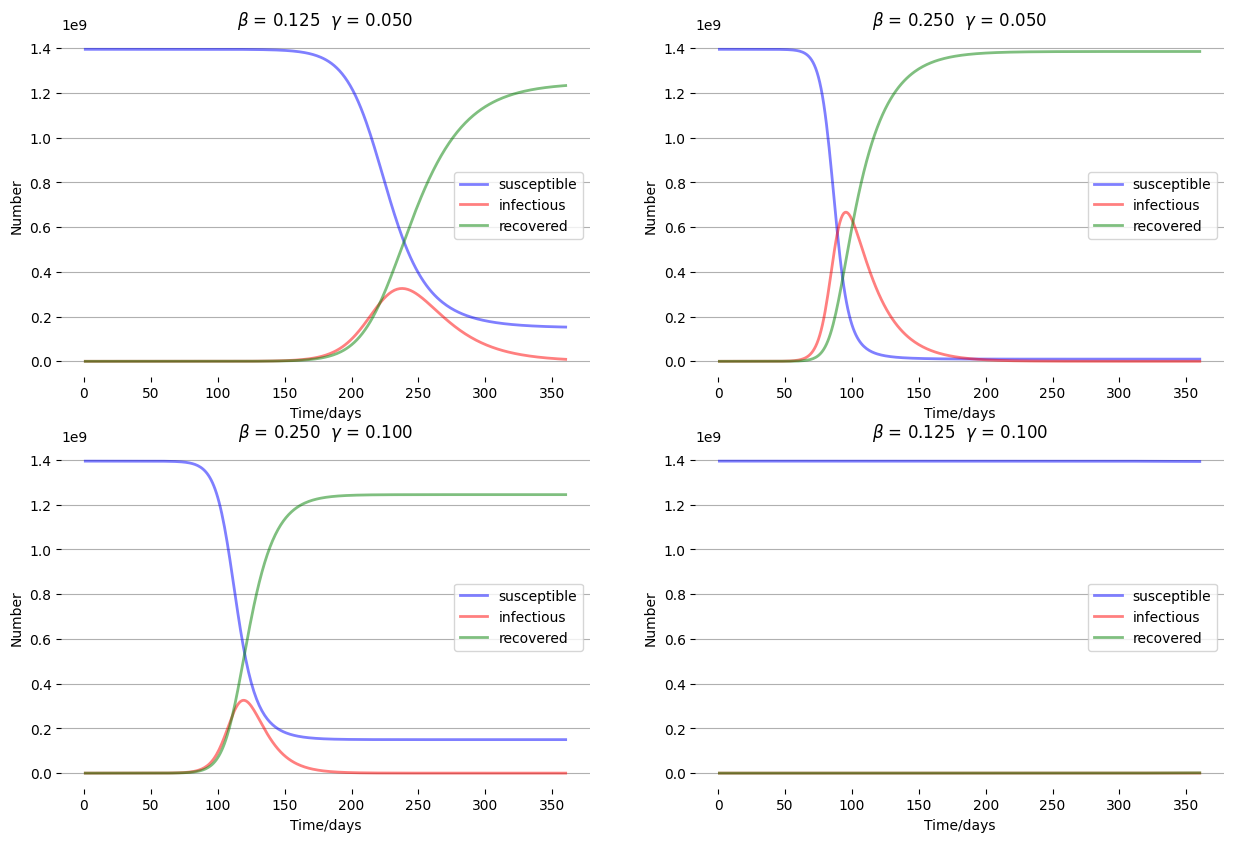

In [23]:
t = np.linspace(1,360,360)
# 设置beta和gamma参数
param_list = [(0.125, 0.05),
        (0.25, 0.05),
        (0.25, 0.1),
        (0.125, 0.1)]
# 预测
solution_list = [odeint(SIR, y0, t, args=item) for item in param_list]
# 绘图
fig = plt.figure(facecolor='w',figsize=(15,10), dpi=100)

for plot_index, solution, params in zip(range(5)[1:], solution_list, param_list):
    
    ax = fig.add_subplot(int('22'+str(plot_index)))
    ax.set_title(r'$\beta$ = %.3f  $\gamma$ = %.3f' % params)
    
    for index, color, label_name in zip(range(3), 
                                        ['b','r','g'],
                                        ['susceptible','infectious','recovered']):
        ax.plot(t, solution[:, index], color, alpha=0.5, lw=2, label=label_name)
    
    ax.set_xlabel('Time/days')
    ax.set_ylabel('Number')
    ax.legend()
    ax.grid(axis='y')
    plt.box(False)

# 意大利

 定义损失函数所有时间点的实际函数值和估价函数值之间的均方误差

In [24]:
def loss(parameters,infectious, recovered, y0):
    # 确定训练模型的天数
    size = len(infectious)
    # 设置时间跨度
    t = np.linspace(1,size,size)
    beta, gamma = parameters
    # 计算预测值
    solution = odeint(SIR, y0, t, args=(beta, gamma))
    # 计算每日的感染者人数的预测值和真实值的均方误差
    l1 = np.mean((solution[:,1] - infectious)**2)
    # 计算每日的治愈者人数的预测值和真实值之间的均方误差
    l2 = np.mean((solution[:,2] - recovered)**2)
    # 返回SIR模型的损失值
    return l1+l2

2.2 读取数据并划分训练集与验证集

In [25]:
import pandas as pd
import numpy as np
# 读取所有国家的疫情数据
data = pd.read_csv('/content/drive/MyDrive/大数据分析与挖掘/新冠疫情分析/alltime_world_2021_01_07.csv')
# 挑选出其中关于意大利的疫情数据
italy = data[data['name']=='意大利']

In [26]:
italy

,date,total_confirm,total_suspect,total_heal,total_dead,total_severe,total_input,today_confirm,today_suspect,today_heal,today_dead,today_severe,today_storeConfirm,today_input,name
35755,2020-01-31,2,0,0,0,0,0,2,0.0,0,0,NaN,NaN,NaN,意大利
35756,2020-02-01,2,0,0,0,0,0,0,0.0,0,0,NaN,NaN,0.0,意大利
35757,2020-02-02,2,0,0,0,0,0,0,0.0,0,0,NaN,NaN,0.0,意大利
35758,2020-02-03,2,0,0,0,0,0,0,0.0,0,0,NaN,NaN,0.0,意大利
35759,2020-02-04,2,0,0,0,0,0,0,0.0,0,0,NaN,NaN,0.0,意大利
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36088,2021-01-02,2129376,0,1479988,74621,0,0,22210,NaN,16877,462,NaN,NaN,0.0,意大利
36089,2021-01-03,2141201,0,1489154,74985,0,0,11825,NaN,9166,364,NaN,NaN,0.0,意大利
36090,2021-01-04,2155446,0,1503900,75332,0,0,14245,NaN,14746,347,NaN,NaN,0.0,意大利
36091,2021-01-05,2166244,0,1520106,75680,0,0,10798,NaN,16206,348,NaN,NaN,0.0,意大利


In [27]:
# 截取9月1日至11月1日之间的意大利疫情数据
italy_train = italy.set_index('date').loc['2020-09-01':'2020-11-01']
# 确定训练集每天的感染者人数
infectious_train = italy_train['total_confirm'] - italy_train['total_heal'] - italy_train['total_dead']
# 与建立SIR模型时相类似，这里我们也选取每天的康复者和死亡者作为SIR模型的恢复者
recovered_train = italy_train['total_heal'] + italy_train['total_dead']

In [28]:
infectious_train

date
2020-09-01     26078
2020-09-02     26754
2020-09-03     28915
2020-09-04     28915
2020-09-05     30099
               ...  
2020-10-28    255090
2020-10-29    276457
2020-10-30    299191
2020-10-31    325786
2020-11-01    351386
Length: 62, dtype: int64

In [29]:
recovered_train

date
2020-09-01    243136
2020-09-02    243435
2020-09-03    243997
2020-09-04    243997
2020-09-05    244545
               ...  
2020-10-28    309688
2020-10-29    313309
2020-10-30    317404
2020-10-31    321888
2020-11-01    328044
Length: 62, dtype: int64

In [30]:
# 设置总人口N = 60000000
N = 60000000
# 确定训练集每天的易感者人数
susceptible_train = N - recovered_train - infectious_train
susceptible_train

date
2020-09-01    59730786
2020-09-02    59729811
2020-09-03    59727088
2020-09-04    59727088
2020-09-05    59725356
                ...   
2020-10-28    59435222
2020-10-29    59410234
2020-10-30    59383405
2020-10-31    59352326
2020-11-01    59320570
Length: 62, dtype: int64

In [48]:
# 截取11月02日至1月7日之间的意大利疫情数据
italy_valid = italy.set_index('date').loc['2020-12-20':'2021-01-07']
# 确定验证集的每天的感染者人数
infectious_valid = italy_valid['total_confirm'] - italy_valid['total_heal'] - italy_valid['total_dead']
# 确定验证集的每天的治愈者人数
recovered_valid = italy_valid['total_heal'] + italy_valid['total_dead']
# 因为我们的损失函数中只包含I(t)和R(t),所以在验证集中，我们不再计算易感者人数

In [49]:
# 模型初始值
I0 = 2
R0 = 0
S0 = N - I0 - R0
y0 = [S0,I0,R0]

# 导入minimize函数
from scipy.optimize import minimize

# 训练模型
# 设置beat，gamma都为0.0001
optimal = minimize(loss,[0.0001,0.0001],
          args=(infectious_train,recovered_train,y0),  # args中是损失函数中剩下的参数
          method='L-BFGS-B',  # 更新方法为L-BFGS-B
          bounds=[(0.00000001, 1), (0.00000001, 1)]) #范围确定在0~1之间

In [50]:
beta,gamma = optimal.x
# 输出beta、gamma值
print([beta,gamma])

[0.8779919549579271, 0.608850481389435]


In [51]:
a = italy.set_index('date').loc['2020-11-02']
a

total_confirm         709335
total_suspect              0
total_heal            292380
total_dead             38826
total_severe               0
total_input                0
today_confirm          29905
today_suspect            NaN
today_heal              2954
today_dead               208
today_severe             NaN
today_storeConfirm       NaN
today_input                0
name                     意大利
Name: 2020-11-02, dtype: object

IO_valid = total_confirm - total_heal - total_dead

RO_calid = total_heal + total_dead

In [52]:
# 确定初值
I0_valid = 378129 # 感染人数
R0_valid = 331206 # 治愈者人数
S0_valid = N - I0_valid- R0_valid
y0_valid = [S0_valid, I0_valid, R0_valid]

对11月2日到1月7日意大利疫情进行预测

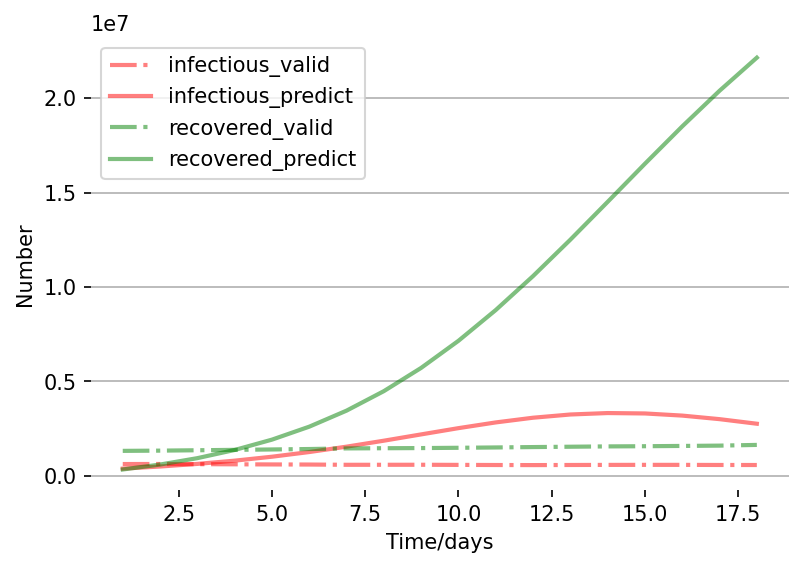

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
# 确定观察的时间周期
T = len(infectious_valid)
# 设置估计疫情的时间跨度为T天
t = np.linspace(1,T,T)
# 估计三种人数的数量
solution = odeint(SIR, y0_valid, t, args = (beta, gamma))
# 绘图
fig, ax = plt.subplots(facecolor='w', dpi=150)
# 绘制估计的I曲线与真实的I曲线
ax.plot(t, infectious_valid, 'r-.', alpha=0.5, lw=2, label='infectious_valid')
ax.plot(t, solution[:,1], 'r', alpha=0.5, lw=2, label='infectious_predict')
# 绘制估计的R曲线与真实的R曲线
ax.plot(t, recovered_valid, 'g-.', alpha=0.5, lw=2, label='recovered_valid')
ax.plot(t, solution[:,2], 'g', alpha=0.5, lw=2, label='recovered_predict')
# 设置横纵坐标轴
ax.set_xlabel('Time/days')
ax.set_ylabel('Number')
# 添加图例
ax.legend()
ax.grid(axis='y')
plt.box(False)

将SIR模型封装成一个类

In [54]:
class SIRModel:
    
    import numpy as np
    from scipy.integrate import odeint
    
    def __init__(self, beta, gamma, method):
        
        self.__beta = beta
        self.__gamma = gamma
        self.__method = method  
        self.__optimal = None
        self.__predict_loss = None

    def sir_model(self, y0, t, beta, gamma):
        
        S, I, R = y0
        dSdt = -beta*S*I/(S+I+R)
        dIdt = beta*S*I/(S+I+R) - gamma*I
        dRdt = gamma*I
        return [dSdt, dIdt, dRdt]
    
    def loss_function(self, params, infected, recovered, y0):
        
        size = len(infected)
        t = np.linspace(1,size,size)
        beta, gamma = params
        solution = odeint(self.sir_model, y0, t, args=(beta, gamma))
        l1 = np.mean((solution[:,1] - infected)**2)
        l2 = np.mean((solution[:,2] - recovered)**2)
        return l1+l2
    #训练模型
    def fit(self, y0, infected, recovered):

        self.__optimal = minimize(self.loss_function, [self.__beta, self.__gamma],
                                args=(infected, recovered, y0),
                                method=self.__method, 
                                bounds=[(0.00000001, 1), (0.00000001, 1)])
    
    def predict(self, test_y0, days):
        
        
        predict_result = odeint(self.sir_model, test_y0, np.linspace(1,days,days), args=tuple(self.__optimal.x))
        return predict_result
    # 得到beat，gamma估计值
    def get_optimal_params(self):
        return self.__optimal.x
    
    def get_predict_loss(self):
        return self.__predict_loss
    
# 模型初始值
def get_init_data(N, I0, R0):
    S0 = N - I0 - R0
    return [S0, I0, R0]   

In [55]:
italy.set_index('date').loc['2020-11-01']

total_confirm         679430
total_suspect              0
total_heal            289426
total_dead             38618
total_severe               0
total_input                0
today_confirm          31756
today_suspect            NaN
today_heal              5859
today_dead               297
today_severe             NaN
today_storeConfirm       NaN
today_input                0
name                     意大利
Name: 2020-11-01, dtype: object

In [56]:
# 截取11月1日至12月20日之间的意大利疫情数据
italy_train = italy.set_index('date').loc['2020-11-01':'2020-12-20']
# 确定训练集每天的感染者人数
infectious_train = italy_train['total_confirm'] - italy_train['total_heal'] - italy_train['total_dead']
# 与建立SIR模型时相类似，这里我们也选取每天的康复者和死亡者作为SIR模型的恢复者
recovered_train = italy_train['total_heal'] + italy_train['total_dead']


N = 60000000
I0 = 351386
R0 = 328044
y0 = get_init_data(N, I0, R0)

# 建立模型，设定beta gamma初始值，优化方法
model = SIRModel(0.0001, 0.0001, 'L-BFGS-B')

# 训练模型，输入参数：初始值，训练集
model.fit(y0, infectious_train, recovered_train)

# 输出估计最优参数
best_params = model.get_optimal_params()

In [57]:
best_params

array([0.05473768, 0.0342422 ])

In [58]:
italy.set_index('date').loc['2020-12-20']

total_confirm         1938083
total_suspect               0
total_heal            1249470
total_dead              68447
total_severe                0
total_input                 0
today_confirm           16305
today_suspect             NaN
today_heal              23384
today_dead                553
today_severe              NaN
today_storeConfirm        NaN
today_input                 0
name                      意大利
Name: 2020-12-20, dtype: object

In [65]:
# 12月20日疫情初值
I0_valid = 620166
R0_valid = 1317917

y0_valid = get_init_data(N, I0_valid, R0_valid)
# 预测
predict_result = model.predict(y0_valid,18)

In [66]:
predict_result[:,1].shape

(18,)

In [67]:
predict_result[:,2].shape

(18,)

In [68]:
infectious_valid.shape

(18,)

In [69]:
# 截取12月02日至1月7日之间的意大利疫情数据
italy_valid = italy.set_index('date').loc['2020-12-20':'2021-01-07']
# 确定验证集的每天的感染者人数
infectious_valid = italy_valid['total_confirm'] - italy_valid['total_heal'] - italy_valid['total_dead']
# 确定验证集的每天的治愈者人数
recovered_valid = italy_valid['total_heal'] + italy_valid['total_dead']
# 因为我们的损失函数中只包含I(t)和R(t),所以在验证集中，我们不再计算易感者人数

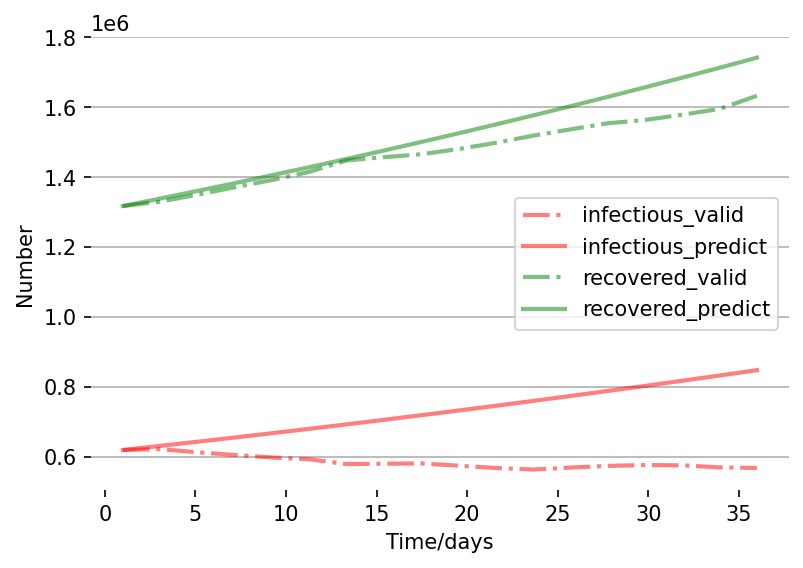

In [70]:
t = np.linspace(1,36,18)
# 绘图
fig, ax = plt.subplots(facecolor='w', dpi=150)
# 绘制估计的I曲线与真实的I曲线
ax.plot(t, infectious_valid, 'r-.', alpha=0.5, lw=2, label='infectious_valid')
ax.plot(t, predict_result[:,1], 'r', alpha=0.5, lw=2, label='infectious_predict')
# 绘制估计的R曲线与真实的R曲线
ax.plot(t, recovered_valid, 'g-.', alpha=0.5, lw=2, label='recovered_valid')
ax.plot(t, predict_result[:,2], 'g', alpha=0.5, lw=2, label='recovered_predict')
# 设置横纵坐标轴
ax.set_xlabel('Time/days')
ax.set_ylabel('Number')
# 添加图例
ax.legend()
ax.grid(axis='y')
plt.box(False)

In [71]:
italy.set_index('date').loc['2020-12-20']

total_confirm         1938083
total_suspect               0
total_heal            1249470
total_dead              68447
total_severe                0
total_input                 0
today_confirm           16305
today_suspect             NaN
today_heal              23384
today_dead                553
today_severe              NaN
today_storeConfirm        NaN
today_input                 0
name                      意大利
Name: 2020-12-20, dtype: object

In [72]:
# 截取12月20日至1月7日之间的意大利疫情数据
italy_train = italy.set_index('date').loc['2020-12-20':'2021-01-07']
# 确定训练集每天的感染者人数
infectious_train = italy_train['total_confirm'] - italy_train['total_heal'] - italy_train['total_dead']
# 与建立SIR模型时相类似，这里我们也选取每天的康复者和死亡者作为SIR模型的恢复者
recovered_train = italy_train['total_heal'] + italy_train['total_dead']

N = 60000000
I0 = 620166
R0 = 1317917
y0 = get_init_data(N, I0, R0)

# 建立模型，设定beta gamma初始值，优化方法
new_model = SIRModel(0.0001, 0.0001, 'L-BFGS-B')

# 训练模型，输入参数：初始值，训练集
new_model.fit(y0, infectious_train,recovered_train)

# 输出估计最优参数
best_params = new_model.get_optimal_params()

In [73]:
best_params

array([0.02489701, 0.03046275])

In [74]:
italy.set_index('date').loc['2021-01-07']

total_confirm         2201945
total_suspect               0
total_heal            1556356
total_dead              76877
total_severe                0
total_input                 0
today_confirm           35701
today_suspect             NaN
today_heal              36250
today_dead               1197
today_severe              NaN
today_storeConfirm        NaN
today_input                 0
name                      意大利
Name: 2021-01-07, dtype: object

In [75]:
N = 60000000
I0 = 568712
R0 = 1633233
y0_test = get_init_data(N, I0, R0)

# 进行预测
predict_result = new_model.predict(y0_test,365)

In [76]:
predict_result[:,1].shape

(365,)

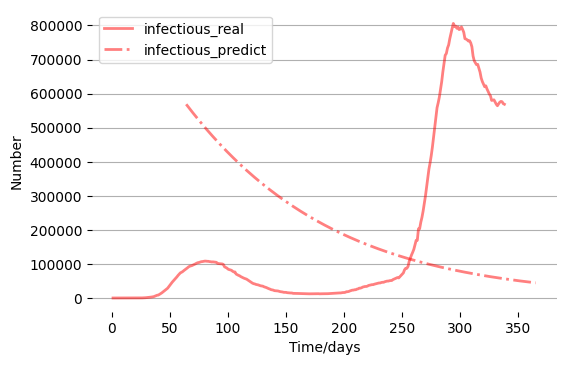

In [77]:
infectious_real = italy['total_confirm'] - italy['total_heal'] - italy['total_dead']
recovered_real = italy['total_heal'] + italy['total_dead']
t = np.linspace(1,len(infectious_real),len(infectious_real))
tpredict = np.linspace(64,365,365)

fig = plt.figure(facecolor='w',dpi=100)
ax = fig.add_subplot(111)
# 绘制真实的I曲线与真实的R曲线
ax.plot(t, infectious_real, 'r', alpha=0.5, lw=2, label='infectious_real')
# ax.plot(t, recovered_real, 'g', alpha=0.5, lw=2, label='recovered_real')
# 绘制预测的I曲线、R曲线与S曲线
ax.plot(tpredict, predict_result[:,1], 'r-.', alpha=0.5, lw=2, label='infectious_predict')
# ax.plot(tpredict, predict_result[:,2], 'g-.', alpha=0.5, lw=2, label='recovered_predict')
# ax.plot(tpredict, predict_result[:,0], 'b-.', alpha=0.5, lw=2, label='susceptible_predict')


# 设置横纵坐标轴
ax.set_xlabel('Time/days')
ax.set_ylabel('Number')
# 添加图例
legend = ax.legend()
ax.grid(axis='y')
plt.box(False)

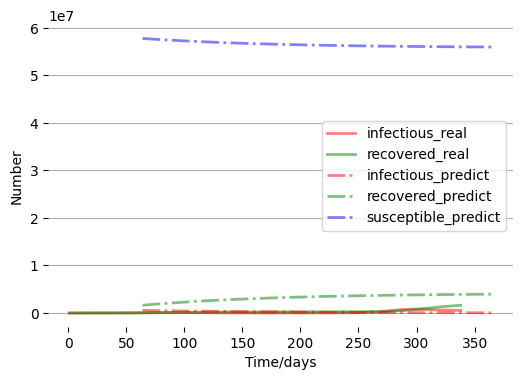

In [78]:
infectious_real = italy['total_confirm'] - italy['total_heal'] - italy['total_dead']
recovered_real = italy['total_heal'] + italy['total_dead']
t = np.linspace(1,len(infectious_real),len(infectious_real))
tpredict = np.linspace(64,365,365)

fig = plt.figure(facecolor='w',dpi=100)
ax = fig.add_subplot(111)
# 绘制真实的I曲线与真实的R曲线
ax.plot(t, infectious_real, 'r', alpha=0.5, lw=2, label='infectious_real')
ax.plot(t, recovered_real, 'g', alpha=0.5, lw=2, label='recovered_real')
# 绘制预测的I曲线、R曲线与S曲线
ax.plot(tpredict, predict_result[:,1], 'r-.', alpha=0.5, lw=2, label='infectious_predict')
ax.plot(tpredict, predict_result[:,2], 'g-.', alpha=0.5, lw=2, label='recovered_predict')
ax.plot(tpredict, predict_result[:,0], 'b-.', alpha=0.5, lw=2, label='susceptible_predict')


# 设置横纵坐标轴
ax.set_xlabel('Time/days')
ax.set_ylabel('Number')
# 添加图例
legend = ax.legend()
ax.grid(axis='y')
plt.box(False)